In [ ]:
import ee
import geemap
!pip install xee
import xee
import xarray as xr
import pandas as pd


In [2]:
ee.Authenticate()
ee.Initialize(
    project = 'ee-lavibas23',
    opt_url = 'https://earthengine-highvolume.googleapis.com'
)

In [3]:
map = geemap.Map(basemap = 'SATELLITE')
map


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [4]:
roi = map.draw_last_feature.geometry()

roi


ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          81.194261,
                          8.531114
                        ],
                        [
                          81.194261,
                          8.601729
                        ],
                        [
                          81.257071,
                          8.601729
                        ],
                        [
                          81.257071,
                          8.531114
                        ],
                        [
                          81.194261,
                          8.531114
                        ]
                      ]
                    ]
                  },
                  "geodesic": {
                    "constantValue": false
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [5]:
collection = (
    ee.ImageCollection("JRC/GHSL/P2023A/GHS_BUILT_S")
    .filterBounds(roi)
    .select('built_surface')
)

collection


In [6]:
ds = xr.open_dataset(
    collection,
    engine = 'ee',
    crs = 'EPSG:4326',
    geometry = roi,
    scale = 0.001
)

ds

<xarray.Dataset> Size: 216kB
Dimensions:        (time: 12, lon: 63, lat: 71)
Coordinates:
  * time           (time) datetime64[ns] 96B 1975-01-01 ... 2030-01-01
  * lon            (lon) float64 504B 81.19 81.2 81.2 81.2 ... 81.25 81.26 81.26
  * lat            (lat) float64 568B 8.532 8.533 8.534 ... 8.6 8.601 8.602
Data variables:
    built_surface  (time, lon, lat) float32 215kB ...
Attributes:
    crs:      EPSG:4326

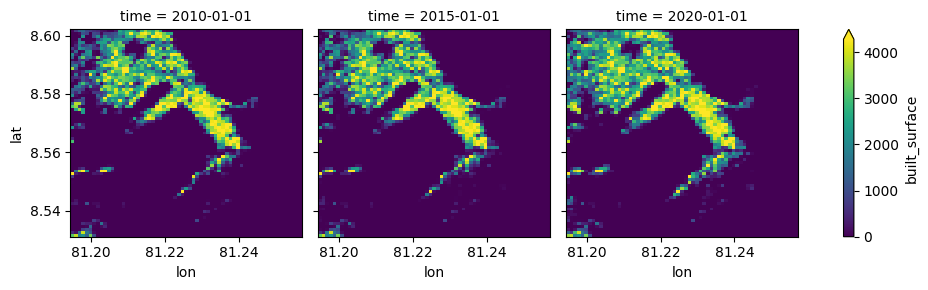

In [7]:
ds.sel(time = slice('2010','2020')).built_surface.plot(
    x = 'lon',
    y = 'lat',
    col = 'time',
    robust = True
)

In [8]:
time_start = ds.time.values[0]
time_end = ds.time.values[-1]
time_list = pd.date_range(time_start, time_end, freq = 'YE')

time_list

DatetimeIndex(['1975-12-31', '1976-12-31', '1977-12-31', '1978-12-31',
               '1979-12-31', '1980-12-31', '1981-12-31', '1982-12-31',
               '1983-12-31', '1984-12-31', '1985-12-31', '1986-12-31',
               '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31',
               '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31',
               '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31',
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31',
               '2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype

In [9]:
ds_annual = ds.interp(time = time_list)

ds_annual

<xarray.Dataset> Size: 2MB
Dimensions:        (time: 55, lon: 63, lat: 71)
Coordinates:
  * lon            (lon) float64 504B 81.19 81.2 81.2 81.2 ... 81.25 81.26 81.26
  * lat            (lat) float64 568B 8.532 8.533 8.534 ... 8.6 8.601 8.602
  * time           (time) datetime64[ns] 440B 1975-12-31 ... 2029-12-31
Data variables:
    built_surface  (time, lon, lat) float64 2MB 1.535e+03 0.0 0.0 ... 0.0 0.0
Attributes:
    crs:      EPSG:4326

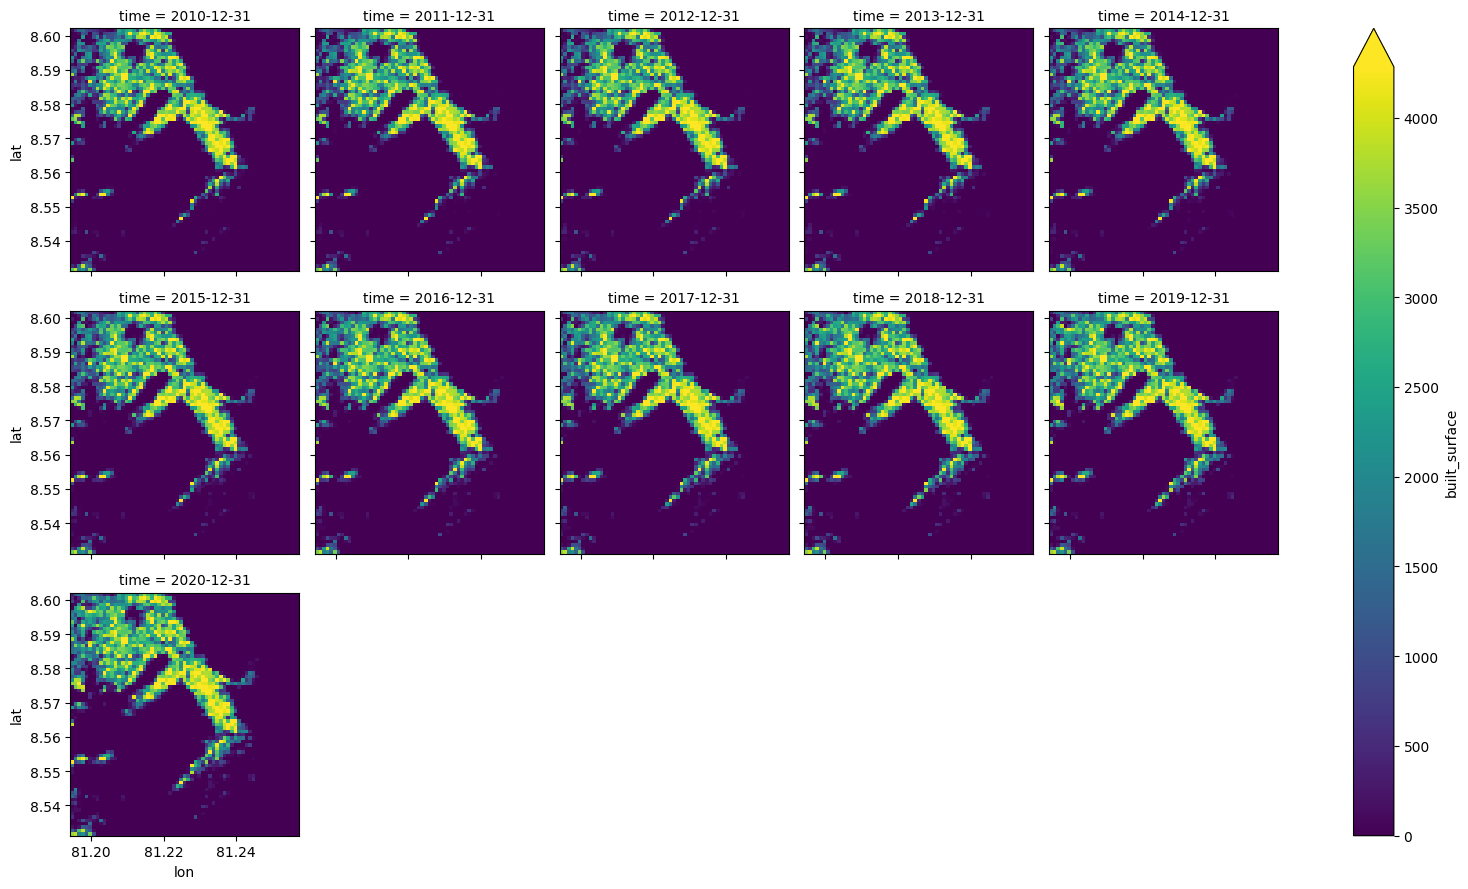

In [10]:
ds_annual.sel(time = slice('2010', '2020')).built_surface.plot(
    x = 'lon',
    y = 'lat',
    col = 'time',
    col_wrap = 5,
    robust =True
)

In [11]:
ds_area = ds.sum(dim = ['lat','lon'])
annual_area = ds_annual.sum(dim = ['lat', 'lon'])

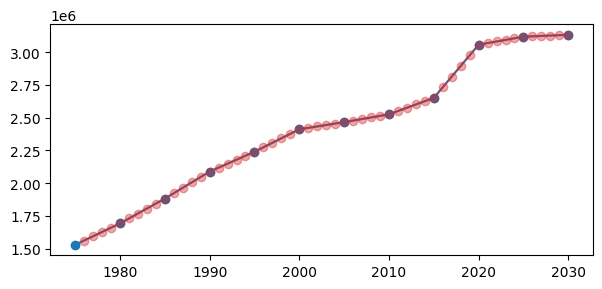

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (7,3))

ax.plot(ds_area.time, ds_area.built_surface, marker = 'o')
ax.plot(annual_area.time, annual_area.built_surface, marker = 'o', color = 'tab:red', alpha = 0.4)